# Data Exploration and Cleaning

This step involves- 

* Combining all the downloaded files into one.
* Cleaning and organizing the data to simplify the analysis.
* Removing the inconsistancies, filling in missing values and,
* Ensuring that the data is ready before starting the analysis.


#### **Tools Used:**

* RStudio Desktop was used for compiling and cleaning the data.
* Tableau was utilized to create visualizations.

Given the size of the dataset—containing millions of rows—a traditional spreadsheet application was not suitable. RStudio provided the efficiency and power needed to process the data effectively.


#### **Using RStudio Desktop:**
The following R packages were installed and loaded to facilitate data cleaning and manipulation:

* tidyverse

* dplyr

* readr

* ggplot2

* lubridate

Additional packages used:

* hydroTSM

* scales


First, I installed and loaded all the required R packages and then imported the CSV files.

In [46]:
library(tidyverse) 
library(scales)
library(hydroTSM)

In [7]:
# Upload and assign names to Divvy datasets (csv files) here
q1_2019 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Divvy_trips_2019_Q1.csv")
q1_2020 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Divvy_trips_2020_Q1.csv")


Rows: 365069 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 426887 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
#After importing the CSV files, I reviewed the files and compared the column names
head(q1_2019)
head(q1_2020)


# This function will return all the column names of the file mentioned in the arguement
colnames(q1_2019)
colnames(q1_2020)

trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 00:04:00,2019-01-01 00:11:00,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:00,2019-01-01 00:15:00,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:00,2019-01-01 00:27:00,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:00,2019-01-01 00:43:00,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:00,2019-01-01 00:20:00,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:00,2019-01-01 00:19:00,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:00,2020-01-21 20:14:00,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member
8FED874C809DC021,docked_bike,2020-01-30 14:22:00,2020-01-30 14:26:00,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member
789F3C21E472CA96,docked_bike,2020-01-09 19:29:00,2020-01-09 19:32:00,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member
C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:00,2020-01-06 16:25:00,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member
943BC3CBECCFD662,docked_bike,2020-01-30 08:37:00,2020-01-30 08:42:00,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member
6D9C8A6938165C11,docked_bike,2020-01-10 12:33:00,2020-01-10 12:37:00,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member


[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [10]:
# Changed the column names to match perfectly before joining both the files into one.
(q1_2019 <- rename(q1_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid
                   ,started_at = start_time
                   ,ended_at = end_time
                   ,start_station_name = from_station_name
                   ,start_station_id = from_station_id
                   ,end_station_name = to_station_name
                   ,end_station_id = to_station_id))

(q1_2020 <- rename(q1_2020
                   ,usertype = member_casual))

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 00:04:00,2019-01-01 00:11:00,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:00,2019-01-01 00:15:00,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:00,2019-01-01 00:27:00,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:00,2019-01-01 00:43:00,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:00,2019-01-01 00:20:00,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:00,2019-01-01 00:19:00,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983
21742449,2019-01-01 00:16:00,2019-01-01 00:19:00,2708,177,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984
21742450,2019-01-01 00:18:00,2019-01-01 00:20:00,2796,100,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990
21742451,2019-01-01 00:18:00,2019-01-01 00:47:00,6205,1727,150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,usertype
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:00,2020-01-21 20:14:00,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member
8FED874C809DC021,docked_bike,2020-01-30 14:22:00,2020-01-30 14:26:00,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member
789F3C21E472CA96,docked_bike,2020-01-09 19:29:00,2020-01-09 19:32:00,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member
C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:00,2020-01-06 16:25:00,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member
943BC3CBECCFD662,docked_bike,2020-01-30 08:37:00,2020-01-30 08:42:00,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member
6D9C8A6938165C11,docked_bike,2020-01-10 12:33:00,2020-01-10 12:37:00,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member
31EB9B8F406D4C82,docked_bike,2020-01-10 13:07:00,2020-01-10 13:12:00,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member
A2B24E3F9C9720E3,docked_bike,2020-01-10 07:24:00,2020-01-10 07:29:00,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member
5E3F01E1441730B7,docked_bike,2020-01-31 16:37:00,2020-01-31 16:42:00,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member


In [11]:
# Next, I inspected the dataframe to look for incongruencies, using the str() function
str(q1_2019)
str(q1_2020)

spc_tbl_ [365,069 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : num [1:365069] 21742443 21742444 21742445 21742446 21742447 ...
 $ started_at        : POSIXct[1:365069], format: "2019-01-01 00:04:00" "2019-01-01 00:08:00" ...
 $ ended_at          : POSIXct[1:365069], format: "2019-01-01 00:11:00" "2019-01-01 00:15:00" ...
 $ rideable_type     : num [1:365069] 2167 4386 1524 252 1170 ...
 $ tripduration      : num [1:365069] 390 441 829 1783 364 ...
 $ start_station_id  : num [1:365069] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:365069] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:365069] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:365069] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ usertype          : chr [1:365069] "Subscriber" "Subscriber" "

In [13]:
# Changed the data type of the columns so that they match.
# Converted ride_id and rideable_type to character so that they can join correctly
q1_2019 <-  mutate(q1_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type))

Now, after data types and column names are changed and matched perfectly, I combined both the dataframes into one big dataframe and removed the fields that were not required.

In [21]:
# Stacked individual quarter's data frames into one big data frame
total_trips <- bind_rows(q1_2019, q1_2020)

# Removed lat, long, birth year, and gender fields as this data was dropped in the beginning of 2020
total_trips <- total_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender,  "tripduration"))

In [22]:
# Then I created a new table with all the fields that were required for the analysis

# Inspected  the new table
colnames(total_trips)  
nrow(total_trips)  
dim(total_trips) 
head(total_trips) 
str(total_trips) 

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "usertype"

[1] 791955

[1] 791955      9

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,usertype
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 00:04:00,2019-01-01 00:11:00,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
21742444,2019-01-01 00:08:00,2019-01-01 00:15:00,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
21742445,2019-01-01 00:13:00,2019-01-01 00:27:00,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
21742446,2019-01-01 00:13:00,2019-01-01 00:43:00,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
21742447,2019-01-01 00:14:00,2019-01-01 00:20:00,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
21742448,2019-01-01 00:15:00,2019-01-01 00:19:00,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


tibble [791,955 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791955] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : POSIXct[1:791955], format: "2019-01-01 00:04:00" "2019-01-01 00:08:00" ...
 $ ended_at          : POSIXct[1:791955], format: "2019-01-01 00:11:00" "2019-01-01 00:15:00" ...
 $ rideable_type     : chr [1:791955] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791955] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791955] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791955] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791955] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ usertype          : chr [1:791955] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


There were a few problems I needed to fix:

(1) In the 'usertype'  column, there were two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual").

(2) The data was only grouped by each ride rightnow, which was too detailed. I added new columns like day, month, year and time to make it easier to organize and analyze the data over time.

(3) I added a new column for length of ride, "ride_length" to the entire dataframe for consistency.

(4) There were some rides where trip duration showed up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons.


In [23]:
# Began by seeing how many observations fall under each usertype
table(total_trips$usertype)

# Reassigned to the desired values (I chose the current 2020 labels)
total_trips <-  total_trips %>% 
  mutate(usertype = recode(usertype
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))


    casual   Customer     member Subscriber 
     48479      23163     378407     341906 

In [24]:
# Added columns to seperate the date, month, day, year and time of each ride from the datetime column.

total_trips$date <- as.Date(total_trips$started_at)
total_trips$month <- format(as.Date(total_trips$date), "%m")
total_trips$day <- format(as.Date(total_trips$date), "%d")
total_trips$year <- format(as.Date(total_trips$date), "%Y")
total_trips$day_of_week <- format(as.Date(total_trips$date), "%A")
total_trips$time <- format(as.POSIXct(total_trips$started_at), format = "%H")

In [26]:
# Added a "ride_length" column to total_trips (in minutes)
total_trips <- total_trips %>%
    filter(!is.na(started_at), !is.na(ended_at))
total_trips$started_at <- ymd_hms(total_trips$started_at)
total_trips$ended_at <- ymd_hms(total_trips$ended_at)
total_trips$ride_length <- difftime(total_trips$ended_at,total_trips$started_at, units = "mins")



In [27]:
# Converted "ride_length" from Factor to numeric to run calculations on the data
is.factor(total_trips$ride_length)
total_trips$ride_length <- as.numeric(as.character(total_trips$ride_length))
is.numeric(total_trips$ride_length)

[1] FALSE

[1] TRUE

In [28]:
# Removed the entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
# Created a new version of the dataframe (total_trips_new) since data was removed
# Also removed the rows that contain missing values
total_trips_new <- total_trips[!(total_trips$start_station_name == "HQ QR" | total_trips$ride_length<=0),]

total_trips_new <- drop_na(total_trips_new)

# Data Analyze

In the analysis phase I analyzed the cleaned and transformed data, to gain a better understanding of its characteristics and patterns. I used *summary()* and *aggregate()* function for descriptive analysis.

In [29]:
# Average ride length of Casual rider and Annual Member
aggregate(total_trips_new$ride_length ~ total_trips_new$usertype, FUN = mean)						

total_trips_new$usertype,total_trips_new$ride_length
<chr>,<dbl>
casual,89.70327
member,13.29796


In [30]:
# Maximum ride length of Casual rider and Annual Member
aggregate(total_trips_new$ride_length ~ total_trips_new$usertype, FUN = max)

total_trips_new$usertype,total_trips_new$ride_length
<chr>,<dbl>
casual,177200
member,101607


In [31]:
# Minimum ride length of Casual rider and Annual Member.
aggregate(total_trips_new$ride_length ~ total_trips_new$usertype, FUN = min)

total_trips_new$usertype,total_trips_new$ride_length
<chr>,<dbl>
casual,1
member,1


In [34]:
# To see the average ride time each day for members vs casual users
aggregate(total_trips_new$ride_length ~ total_trips_new$usertype + total_trips_new$day_of_week, FUN = mean)

total_trips_new$usertype,total_trips_new$day_of_week,total_trips_new$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,84.53245
member,Sunday,16.29482
casual,Monday,79.28326
member,Monday,13.74635
casual,Tuesday,76.16128
member,Tuesday,12.86330
casual,Wednesday,74.90643
member,Wednesday,11.90213
casual,Thursday,141.09853


In [33]:
# Noticed that the days of the week were out of order. Fixed that.
total_trips_new$day_of_week <- ordered(total_trips_new$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

In [39]:
# analyze ridership data by type and day_of_week
total_trips_new %>% 
   group_by(usertype, day_of_week) %>%  
  summarise(number_of_rides = n()							
            ,average_duration = mean(ride_length)
           ,.groups = "drop") %>% 		
  arrange(usertype, day_of_week)	

usertype,day_of_week,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sunday,18612,84.53245
casual,Monday,5585,79.28326
casual,Tuesday,7298,76.16128
casual,Wednesday,7663,74.90643
casual,Thursday,7135,141.09853
casual,Friday,7997,101.68863
casual,Saturday,13461,82.57901
member,Sunday,59883,16.29482
member,Monday,110059,13.74635


In [36]:
# To determine the most popular start stations & end stations among the casual riders.
total_trips %>%
  count(start_station_name)%>%
  arrange(desc(n))

total_trips %>%
  count(end_station_name)%>%
  arrange(desc(n))

start_station_name,n
<chr>,<int>
Canal St & Adams St,14154
Clinton St & Washington Blvd,13640
Clinton St & Madison St,13362
Columbus Dr & Randolph St,9080
Kingsbury St & Kinzie St,9021
Canal St & Madison St,8208
Michigan Ave & Washington St,7523
Franklin St & Monroe St,7227
Larrabee St & Kingsbury St,6708


end_station_name,n
<chr>,<int>
Canal St & Adams St,15067
Clinton St & Washington Blvd,14865
Clinton St & Madison St,13712
Kingsbury St & Kinzie St,8991
Michigan Ave & Washington St,8639
Canal St & Madison St,8581
Clinton St & Lake St,6943
Franklin St & Monroe St,6519
Daley Center Plaza,6458


# Data Visualization

I used *ggplot2* to create charts, graphs and other visualization, that helped me to derive insights, and identify patterns.

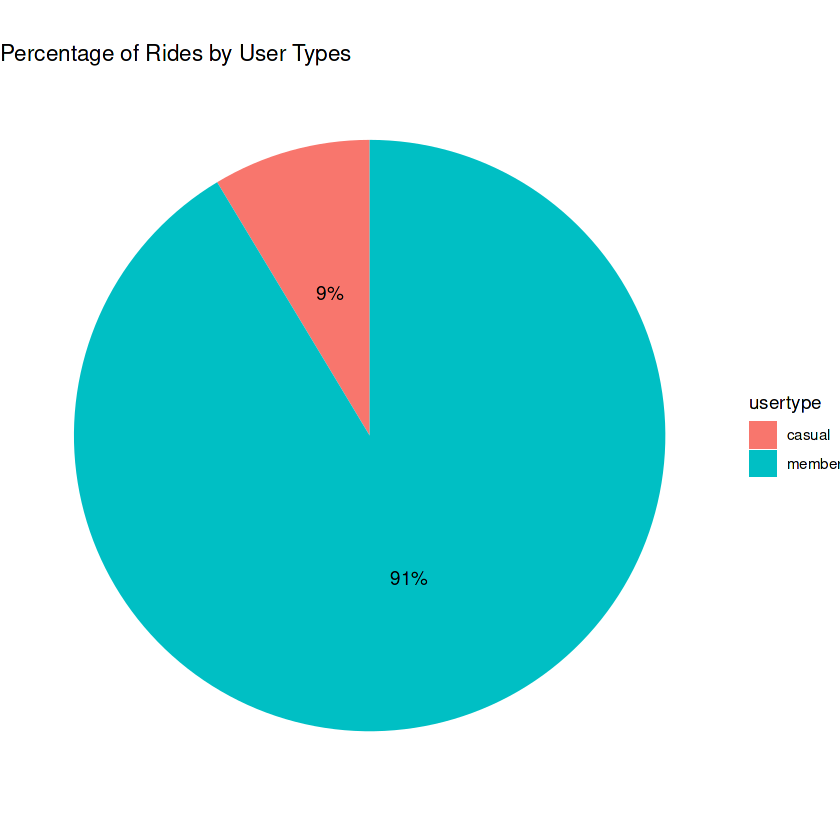

In [40]:
# Visualization to show Percentage of rides by Usertype

total_trips_new %>%
    count(usertype) %>%
    mutate(percentage = round(n/sum(n)*100)) %>%
    ggplot(aes(x = "", y = n, fill = usertype)) + 
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    geom_text(aes(label = paste0(percentage, "%")), position = position_stack(vjust = 0.5)) +
    theme_void() +
    labs(title = "Percentage of Rides by User Types")

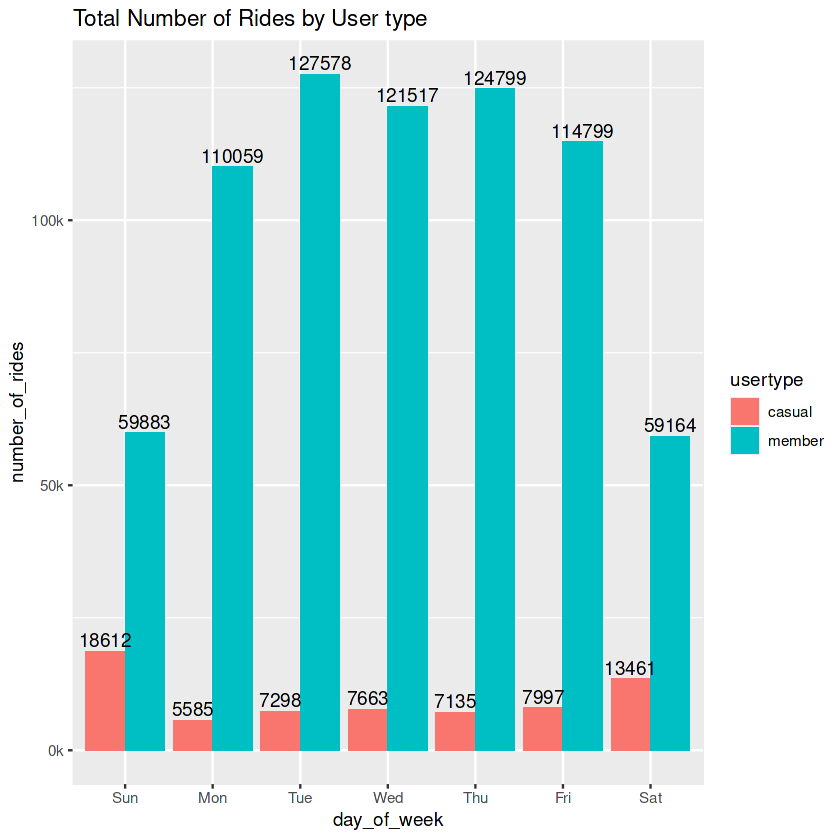

In [38]:
# Number of rides by rider type

total_trips_new %>% 
  mutate(day_of_week = wday(started_at, label = TRUE)) %>% 
  group_by(usertype, day_of_week) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)
           ,.groups = "drop") %>% 
  arrange(usertype, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = usertype)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = number_of_rides), 
            position = position_dodge(width = 0.9), 
            vjust = -0.3) +
  scale_y_continuous(labels = label_comma(scale = 1/1000, suffix = "k")) +
  labs(title = "Total Number of Rides by User type")

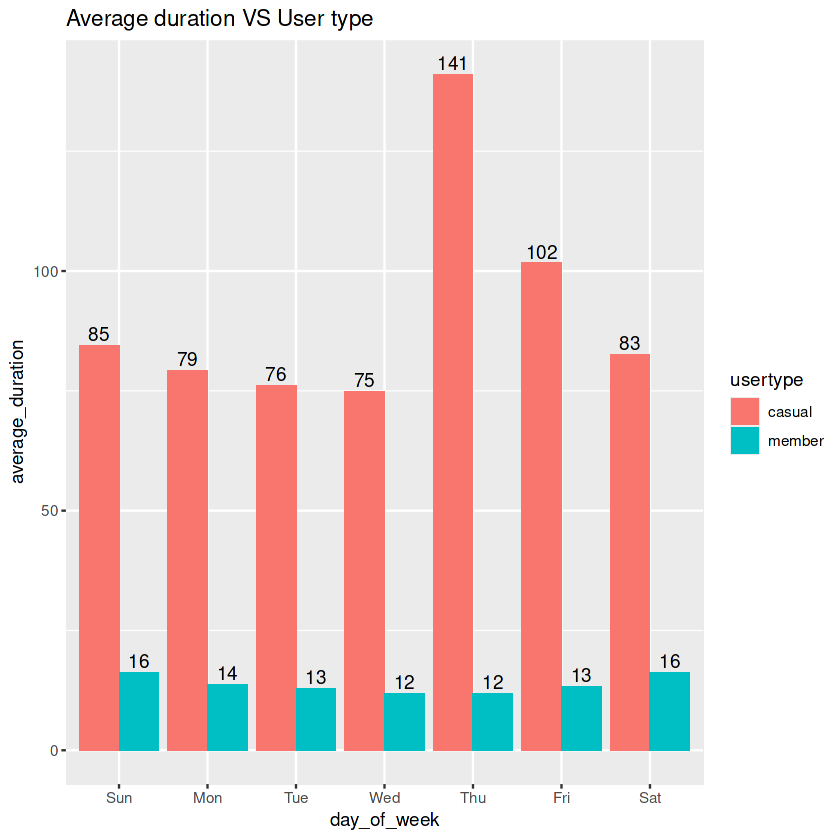

In [48]:
# Average Duration

total_trips_new %>% 
  mutate(day_of_week = wday(started_at, label = TRUE)) %>% 
  group_by(usertype, day_of_week) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)
           ,.groups = "drop") %>% 
  arrange(usertype, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = average_duration, fill = usertype)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = round(average_duration)), 
            position = position_dodge(width = 0.9), 
            vjust = -0.3) +
  labs(title = "Average duration VS User type")

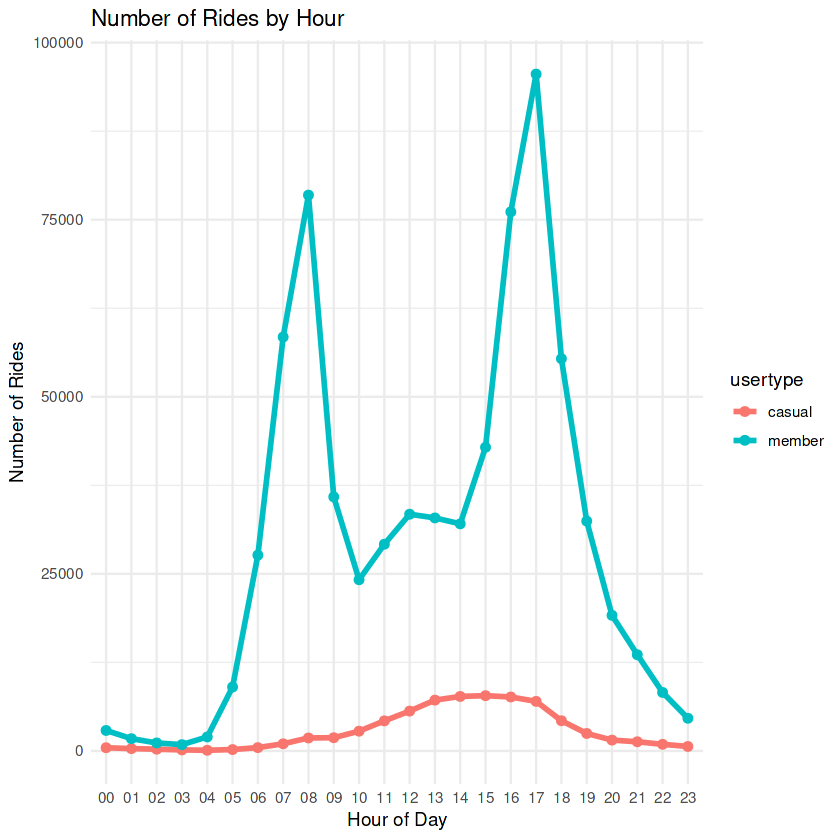

In [43]:
# Ride duration by hour
total_trips_new %>%
  count(time, usertype) %>%
  ggplot(aes(x = time, y = n, , color = usertype, group = usertype)) +
  geom_line(linewidth = 1.2) +
  geom_point(size = 2) +
  labs(title = "Number of Rides by Hour",
       x = "Hour of Day",
       y = "Number of Rides") +
  theme_minimal()

In [45]:
# Exported a csv file that I used to create a dashboard in Tableau

counts <- total_trips_new %>%
  group_by(usertype, day_of_week) %>%
  summarise(
     mean_ride_length = mean(ride_length, na.rm = TRUE),
     sum_ride_length = sum(ride_length, na.rm = TRUE),
     ride_count = n(),
     ,.groups = "drop") %>%
  arrange(day_of_week)
write.csv(counts,"weekdays and usertype.csv", row.names = FALSE)



total_trips_new$time <- as.POSIXct(total_trips_new$time, format = "%I %p")
counts_1 <- total_trips_new %>%
   group_by(time, usertype) %>%
    summarise(
       mean_ride_length = mean(ride_length, na.rm = TRUE),
       sum_ride_length = sum(ride_length, na.rm = TRUE),
       ride_count = n(),
       .groups = "drop"
     ) %>%
    arrange(time)  # sorted by actual time
counts_1$time <- format(counts_1$time, format = "%I %p")
write.csv(counts_1,"time and usertype.csv", row.names = FALSE)
